In [1]:
from coreLib.ocr import MultilingualReader
reader=MultilingualReader()

/home/ansary/anaconda3/envs/mlreader/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2022/06/02 11:17:04] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/ansary/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/ansary/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e

Using CPU. Note: This module is much faster with a GPU.


#LOG     :Loaded Language classifier
#LOG     :Loaded EasyOCR BN(Temporary)


In [2]:
img,df,text_dict=reader("tests/short.png")

# ----generate text----------------------
lines=sorted(df.line_no.unique())
texts=[]
for line in lines:
    ldf=df.loc[df.line_no==line]
    ldf=ldf.sort_values('word_no')
    _text=" ".join(ldf.text.tolist()) 
    texts.append(_text)

100%|██████████| 1/1 [00:04<00:00,  5.00s/it]


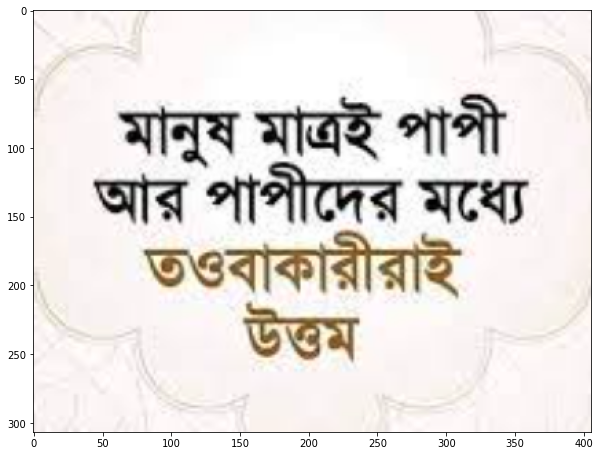

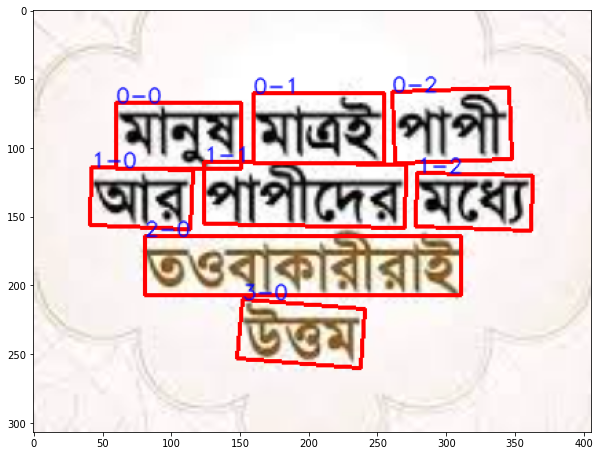

line-1: মানুষ মাত্রই পাপী
line-2: আর পাপীদের মধ্যে
line-3: তওবাকারীরাই
line-4: উত্তম


,line_no,word_no,crop_id,poly,lang,text
0,0,0,1,"[[60.0, 67.0], [151.0, 67.0], [151.0, 115.0], ...",bn,মানুষ
1,0,1,0,"[[160.0, 60.0], [255.0, 60.0], [255.0, 111.0],...",bn,মাত্রই
2,0,2,2,"[[261.0, 59.0], [346.0, 56.0], [348.0, 108.0],...",bn,পাপী
3,1,0,3,"[[42.0, 114.0], [116.0, 116.0], [114.0, 159.0]...",bn,আর
4,1,1,4,"[[124.0, 110.0], [271.0, 112.0], [270.0, 158.0...",bn,পাপীদের
5,1,2,5,"[[279.0, 118.0], [363.0, 120.0], [362.0, 160.0...",bn,মধ্যে
6,2,0,6,"[[81.0, 164.0], [311.0, 164.0], [311.0, 207.0]...",bn,তওবাকারীরাই
7,3,0,7,"[[152.0, 210.0], [241.0, 217.0], [238.0, 260.0...",bn,উত্তম


In [3]:
import matplotlib.pyplot as plt
from coreLib.utils import draw_boxes_from_text_dict

plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.show()
img=draw_boxes_from_text_dict(img,text_dict)
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.show()
for idx,line in enumerate(texts):
    print(f"line-{idx+1}:",line)
df